# Machine Learning Advanced

## Aprendizaje Supervisado - Random Forest

Manuel Montoya - `manuel.montoya@pucp.edu.pe`

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

Loan Prediction: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## librerias

In [1]:
import random
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.3'

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
sns.__version__

'0.11.0'

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [5]:
seed = 12345

In [6]:
target = 'Loan_Status'

## bases

In [7]:
train = pd.read_csv('train_preprocesed.csv')
test = pd.read_csv('test_preprocesed.csv')

In [8]:
train.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.000000,0.066422,0.0,0.170767,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.04797,0.064711,0.076574,0.078223,1
1,0.333333,0.098622,0.0,0.104197,0.72973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.07681,0.038104,0.046723,0.034021,1


In [9]:
test.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.333333,0.024735,0.0,0.075253,0.729730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.010633,0.005578,0.033744,0.067586,1
1,0.000000,0.087292,0.0,0.153401,0.324324,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.066663,0.083086,0.143413,0.118342,0


In [10]:
X_train = train.drop(target, axis = 1)
y_train = train[target]

In [11]:
X_test = test.drop(target, axis = 1)
y_test = test[target]

In [12]:
X_train.shape, y_train.shape

((491, 16), (491,))

In [13]:
X_test.shape, y_test.shape

((123, 16), (123,))

## funciones auxiliares

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

In [15]:
def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

## random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_train_pred = rf.predict(X_train)

In [20]:
y_train_pred.shape, y_train.shape

((491,), (491,))

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [22]:
accuracy_score(y_train, y_train_pred)

1.0

In [23]:
roc_auc_score(y_train, y_train_pred)

1.0

In [24]:
confusion_matrix(y_train, y_train_pred)

array([[337,   0],
       [  0, 154]])

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       154

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



predicciones en el test

In [26]:
y_test_pred = rf.predict(X_test)

In [27]:
accuracy_score(y_test, y_test_pred)

0.7804878048780488

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        85
           1       0.79      0.39      0.53        38

    accuracy                           0.78       123
   macro avg       0.78      0.67      0.69       123
weighted avg       0.78      0.78      0.75       123



## repaso arboles

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       337
           1       0.93      0.50      0.65       154

    accuracy                           0.83       491
   macro avg       0.87      0.74      0.77       491
weighted avg       0.85      0.83      0.81       491

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        85
           1       0.86      0.32      0.46        38

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.66       123
weighted avg       0.79      0.77      0.73       123



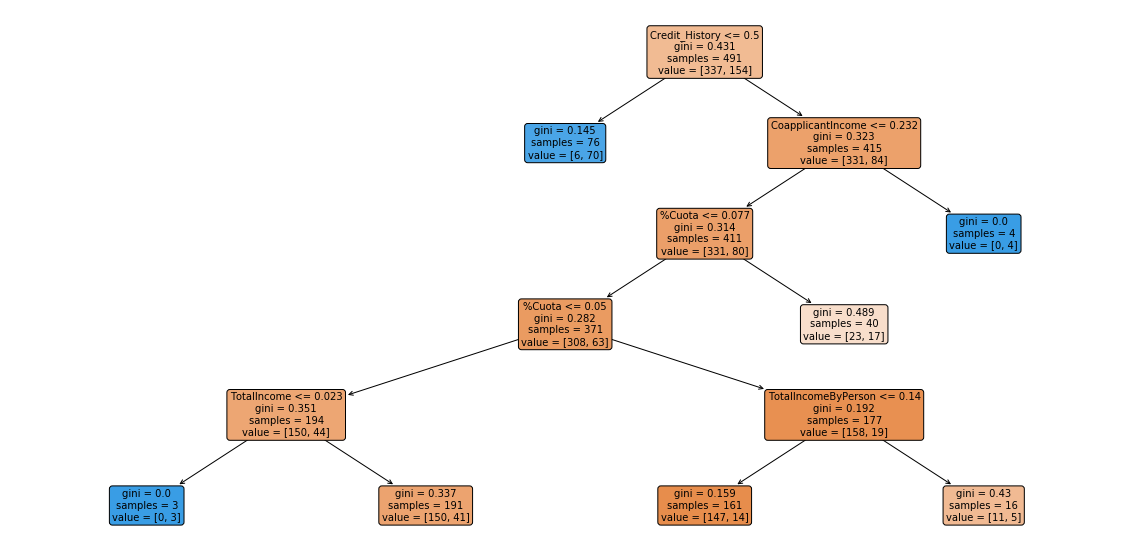

In [30]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_split=100)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(20,10))

_ = plot_tree(dt, fontsize = 10,feature_names = X_train.columns, filled=True, rounded=True)

## random forest con parámetros

In [31]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=50)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       337
           1       0.92      0.53      0.67       154

    accuracy                           0.84       491
   macro avg       0.87      0.75      0.78       491
weighted avg       0.85      0.84      0.82       491

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        85
           1       0.81      0.34      0.48        38

    accuracy                           0.77       123
   macro avg       0.79      0.65      0.67       123
weighted avg       0.78      0.77      0.74       123



In [32]:
y_train_proba = rf.predict_proba(X_train)[:,1]
y_test_proba = rf.predict_proba(X_test)[:,1]

In [33]:
y_train_proba.shape, y_train.shape

((491,), (491,))

In [34]:
y_test_proba.shape, y_test.shape

((123,), (123,))

In [35]:
roc_auc_score(y_train, y_train_proba)

0.9225018305136999

In [36]:
roc_auc_score(y_test, y_test_proba)

0.7845201238390093

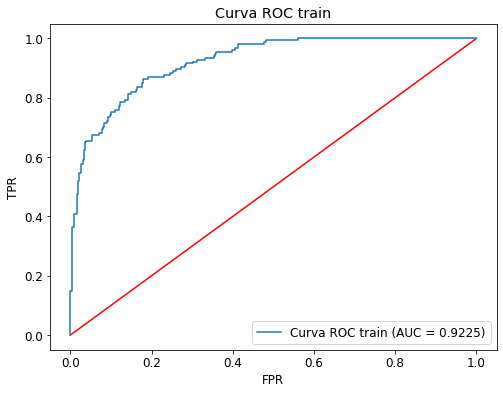

In [37]:
plot_roc_curve(y_train, y_train_proba, 'train')

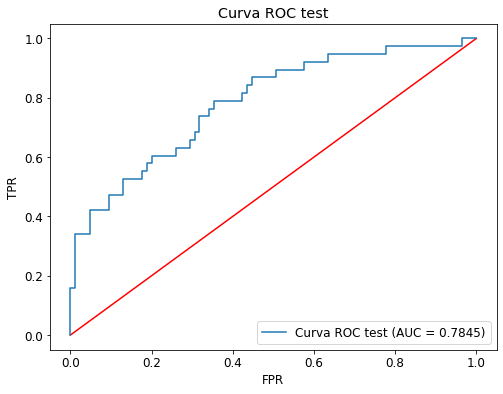

In [38]:
plot_roc_curve(y_test, y_test_proba, 'test')

## grid search

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.metrics import SCORERS

In [41]:
#SCORERS

In [42]:
rf = RandomForestClassifier()

hiperparametros = {'n_estimators': [20, 50],
                   'max_depth': [2, 5, 10],
                   'min_samples_split': [25, 50, 100],
                   'criterion': ['gini', 'entropy']}


gs = GridSearchCV(estimator = rf, param_grid = hiperparametros, scoring = 'roc_auc')

In [43]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [25, 50, 100],
                         'n_estimators': [20, 50]},
             scoring='roc_auc')

In [44]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 100,
 'n_estimators': 50}

In [45]:
resultados = pd.DataFrame(gs.cv_results_)

In [46]:
resultados.to_excel('resultados_random_forest.xlsx')